In [1]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
import altair as alt
import pandas as pd

In [5]:
ds = pd.read_csv('S1SubActivities_preprocessed.csv', index_col = None) 
ds.start = pd.to_datetime(ds.start, format='%Y-%m-%d %H:%M:%S')
ds.end = pd.to_datetime(ds.end, format='%Y-%m-%d %H:%M:%S')
ds = ds.sort_values('start')
ds.reset_index(drop = True, inplace = True)

In [6]:
ds.head(n=5)

,subActNum,subAct,start,end
0,100,Toilet Flush,2003-04-01 20:51:52,2003-04-01 21:05:20
1,68,Sink faucet - hot,2003-04-01 20:51:58,2003-04-01 20:52:05
2,81,Closet,2003-04-01 20:53:36,2003-04-01 20:53:43
3,101,Light switch,2003-04-01 20:53:49,2003-04-01 21:21:43
4,93,Shower faucet,2003-04-01 20:53:52,2003-04-01 20:58:42


* Title with SubActNum and SubAct
* Start Date as Thu 03 March
* Weekends orange
* Weekdays blue
* 24till2
* 3till5
* 6till8
* 9till11
* 12till14
* 15till17
* 18till20
* 21till23

In [7]:
# Unique subActNum list
unique_list = []
for x in ds.subActNum:                     # Traverse for all elements 
    if x not in unique_list:            # Check if exists in unique_list or not 
        unique_list.append(x)     

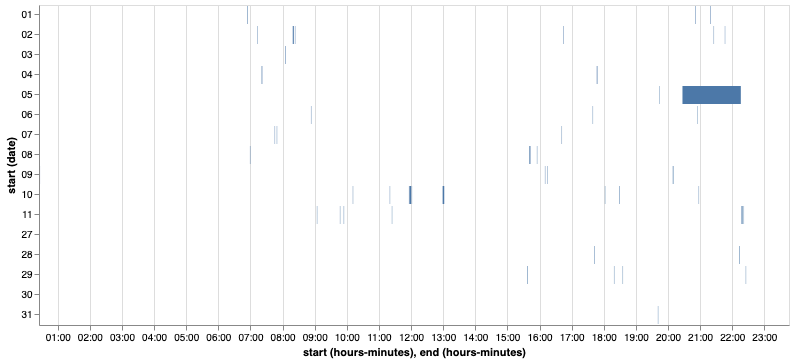

In [7]:
# https://altair-viz.github.io/user_guide/interactions.html
dsCheck = ds[ds['subAct']=='Sink faucet - hot']

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

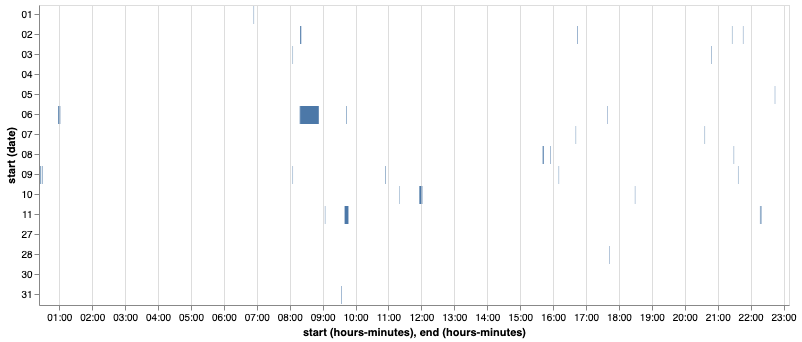

In [90]:
dsCheck = ds[ds['subAct']=='Sink faucet - cold']

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

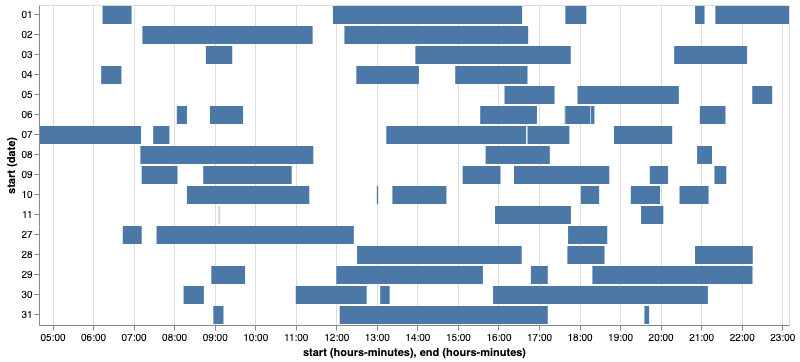

In [10]:
dsCheck = ds[ds['subAct']=='Toilet Flush']

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

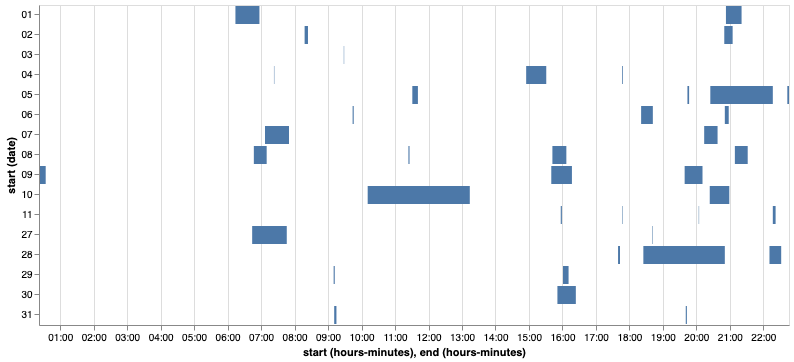

In [9]:
dsCheck = ds[ds['subActNum']==101]

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

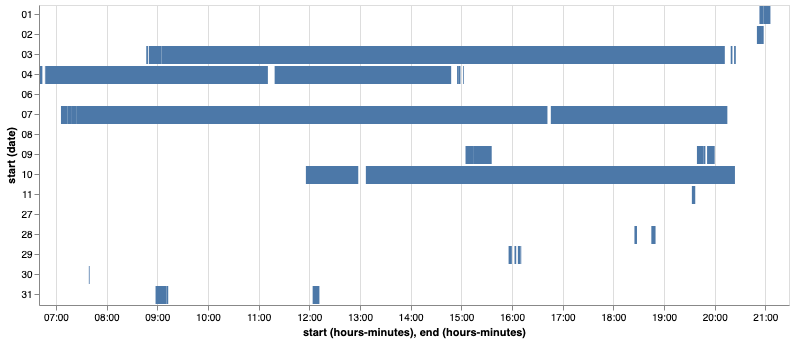

In [95]:
dsCheck = ds[ds['subActNum']==93]

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

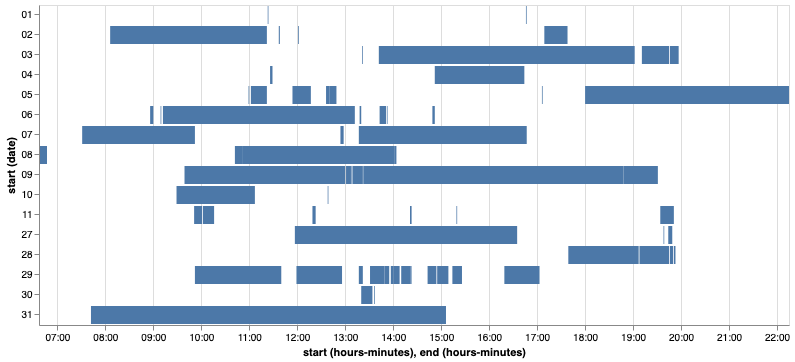

In [109]:
dsCheck = ds[ds['subActNum']==137]

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

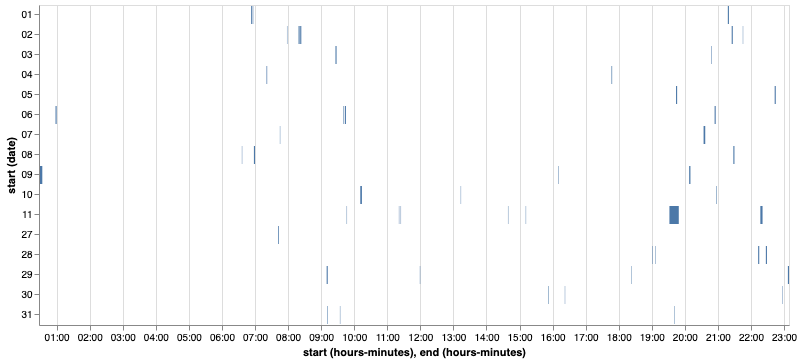

In [99]:
dsCheck = ds[ds['subActNum']==58]

df = pd.DataFrame({ 
    'start': dsCheck.start, 
    'end': dsCheck.end,})

alt.Chart(df.reset_index()).mark_bar().encode(
    y='date(start):O',
    x='hoursminutes(start)',
    x2='hoursminutes(end)',
    detail='index'
).properties(width=750).interactive()

In [108]:
#https://stackoverflow.com/questions/50164001/multiple-column-row-facet-wrap-in-altair?rq=1

---

In [ ]:
charts = []
for value in unique_list:
    dsValue = ds[ds['subActNum'] == value]
    
    df = pd.DataFrame({ 
    'start': dsValue.start, 
    'end': dsValue.end,})

    alt.Chart(df.reset_index()).mark_bar().encode(
        y='date(start):O',
        x='hoursminutes(start)',
        x2='hoursminutes(end)',
        detail='index') 
    
    for i in range(len(unique_list)):
        charts.append(alt.Chart(df).mark_point())
    alt.vconcat(*charts)
